In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')
df.head()

#Observation:
#columns like PassengerId, Survived, Pclass, Name, Sex, Age, Fare, etc.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.info()

#Observation:
#Total entries: 891
#Columns like Age, Cabin, and Embarked have missing values.
#Survived, Pclass, Sex, Embarked are categorical or discrete

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.describe()

#Observation:
#Age: ranges from 0.42 to 80 years.
#Fare: has high variation, max at 512.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isnull().sum()

#Observation:
#Age: ~177 missing
#Cabin: heavily missing (~687)
#Embarked: 2 missing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Sex'].value_counts()
df['Embarked'].value_counts()

#Observation:
#Sex: More males (577) than females (314)
#Embarked: Most boarded at 'S' (644), then 'C' and 'Q'

S    644
C    168
Q     77
Name: Embarked, dtype: int64

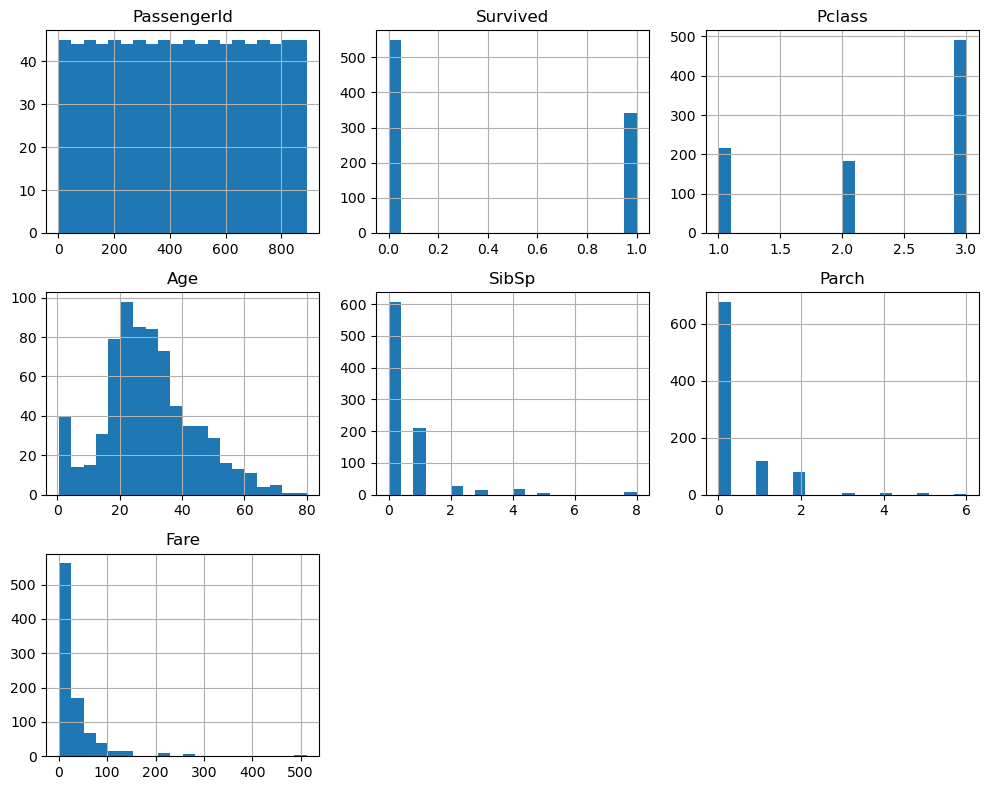

In [6]:
df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

#Observation:
#Fare is right-skewed; few passengers paid very high fares.
#Age shows concentration in 20s–30s.
#SibSp/Parch mostly 0–1, confirming most traveled alone or with 1 person.

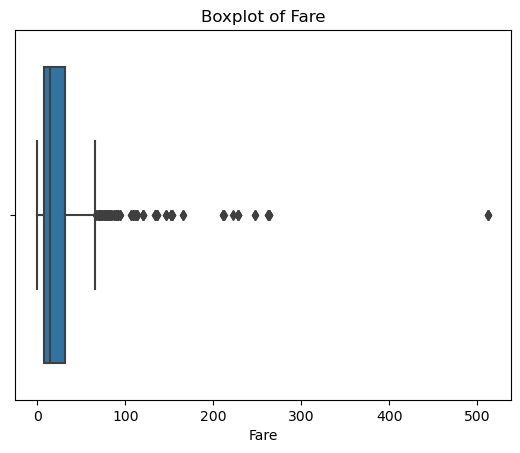

In [7]:
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()

#Observation:
#Shows several outliers in the high-fare range.
#Median fare is below 50.

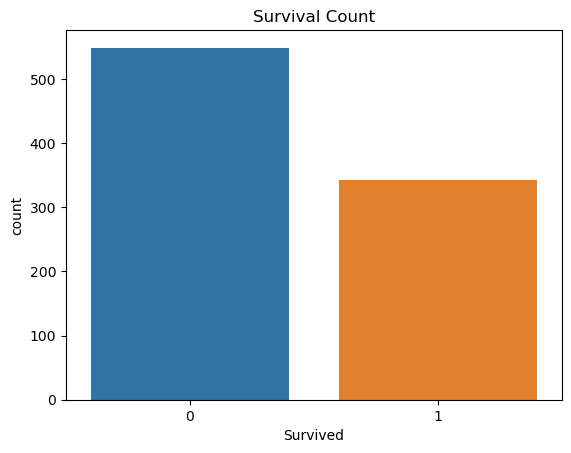

In [8]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

#Observation:
#More people did not survive (0) than did (1).
#Survival rate was under 40%.

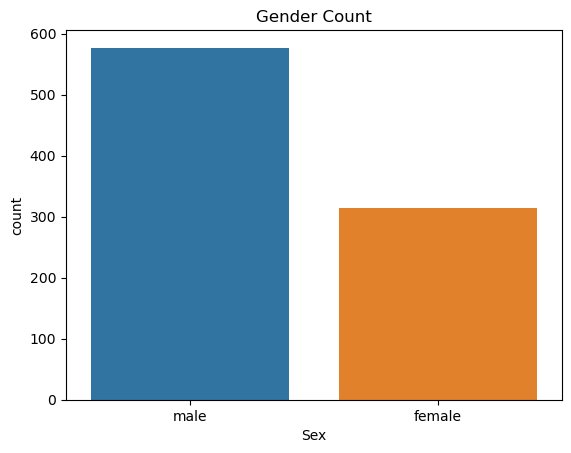

In [9]:
sns.countplot(x='Sex', data=df)
plt.title('Gender Count')
plt.show()

#Observation:
#More males than females.
#Important for survival analysis.

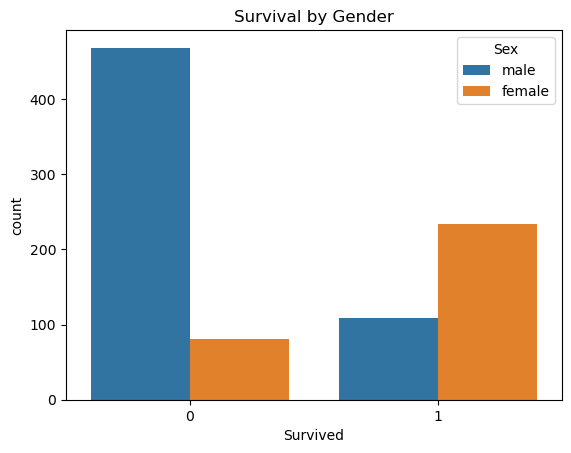

In [10]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Gender')
plt.show()

#Observation:
#Females had significantly higher survival rates.
#Most males died; most females survived.

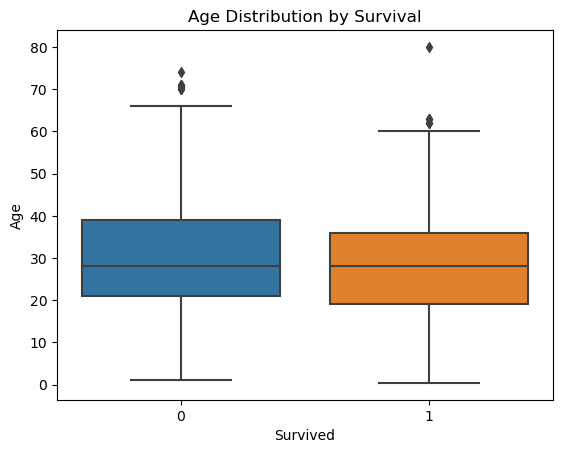

In [11]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

#Observation:
#Survivors had slightly lower median age.
#Younger people had slightly higher survival rate.

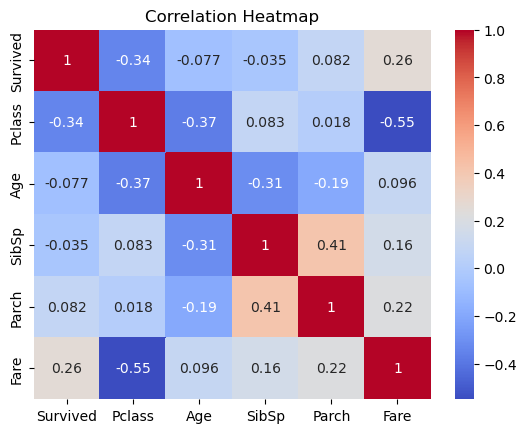

In [12]:
corr = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Observation:
#Survival correlates positively with Fare (0.26) and negatively with Pclass (-0.34).
#SibSp and Parch are slightly correlated (0.41) – family travel.

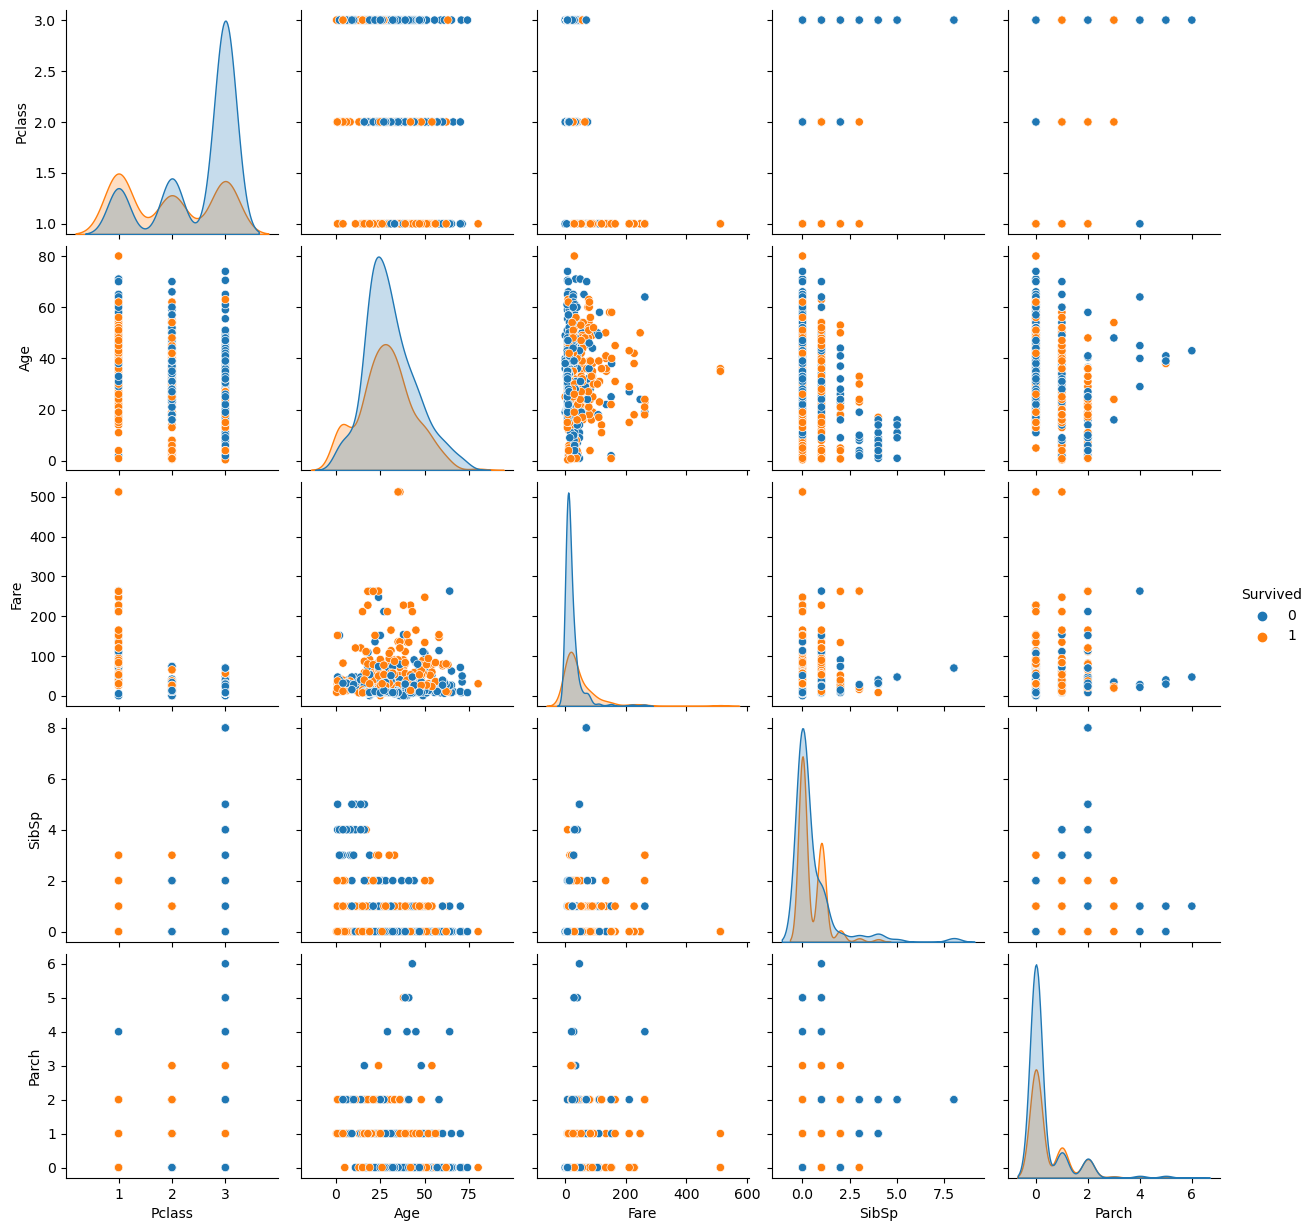

In [13]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']], hue='Survived')
plt.show()

#Observation:
#Clear clustering of survivors in lower Pclass and higher Fare.
#Age and Fare show some separation between survival classes, but not strictly.

In [14]:
#Summary of Insights:

#Sex and Pclass are strong indicators of survival.
#Fare tends to be higher for survivors.
#Younger passengers had a slightly higher survival chance.
#Most passengers were in 3rd class and were male—two groups with lower survival.